In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("sales_data_sample.csv",encoding="latin")

In [46]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,status,month_id,year_id,productline,msrp,country,dealsize
0,10107,30,95.70,2,2871.00,1,2,2003,1,95,18,2
1,10121,34,81.35,5,2765.90,1,5,2003,1,95,6,2
2,10134,41,94.74,2,3884.34,1,7,2003,1,95,6,1
3,10145,45,83.26,6,3746.70,1,8,2003,1,95,18,1
4,10159,49,100.00,14,5205.27,1,10,2003,1,95,18,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [33]:
df.columns = df.columns.str.lower()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      302 non-null    object 


In [42]:
df.isnull().sum()

ordernumber        0
quantityordered    0
priceeach          0
orderlinenumber    0
sales              0
status             0
month_id           0
year_id            0
productline        0
msrp               0
country            0
dealsize           0
dtype: int64

In [36]:
#list of columns to be dropped 
columns_to_drop = ['ordernumber','customername','addressline2', 'territory', 'state', 'city', 'orderdate', 'contactlastname','contactfirstname',
                   'postalcode', 'qtr_id' , 'productcode', 'addressline1', 'phone']


df = df.drop(columns=columns_to_drop)

In [37]:
df['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [38]:
df.replace({'Disputed':'notshipped',
            'In Process':'notshipped',
            'Cancelled':'notshipped',
            'On Hold':'notshipped',
            'Resolved':'notshipped'}, inplace=True)
df['status'] = df['status'].map({'notshipped': 0, 'Shipped': 1})

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
def convert(col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].values)
    

In [43]:
cata= ['productline','country','dealsize']
for c in cata:
    convert(c)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

In [48]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    km = KMeans(n_clusters=k,init='k-means++',random_state=15)
    km.fit(scaled_values)
    wcss.append(km.inertia_)

In [49]:
k = list(range(1,15))

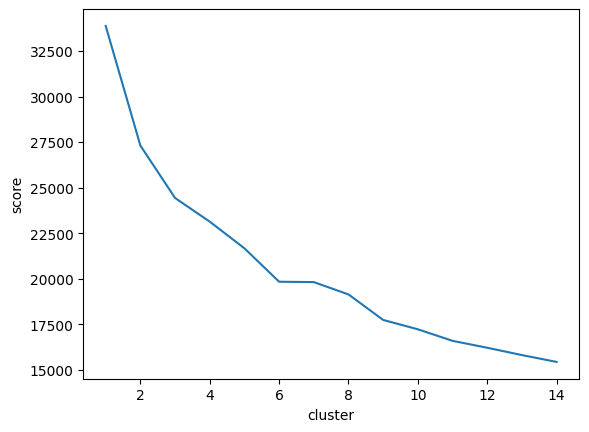

In [51]:
plt.plot(k,wcss)
plt.xlabel('cluster')
plt.ylabel('score')
plt.show()